# Train test split


In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

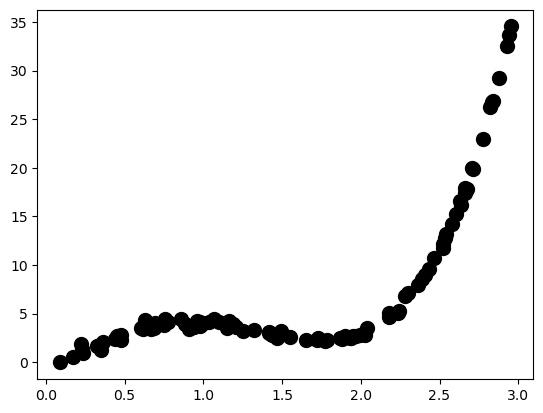

In [8]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10)
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [10]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [11]:
model2 = make_pipeline(PolynomialFeatures(30), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([  5.69908603,   2.73698645,  18.32660318,   3.67449163,
         2.61828581,  35.11116692,   2.73191838,   4.0756763 ,
         2.67451003,   8.59530002,   3.32751157,   3.97183973,
         1.66208246,   2.52495206,   4.05352753,   3.79280647,
       -19.25569141,   2.8503168 ,   2.45672559,   3.64082712,
         2.39923229,   3.55226817,  25.82842065,  14.18545585,
         3.11977651,   3.99029552,   2.80690153,   3.89817396,
         2.56574425,   3.74308458,   0.9074207 ,  28.41544101,
         2.95243482,   3.64967597,   3.03135475,   2.92361313,
         2.67535775,   4.66376173,   3.5815006 ,   7.4267998 ])

In [12]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: -0.033793889015097944
Explained variance score: -0.033793889015097944
Median absolute error: 0.17878748864067906
Mean squared error: 90.54972969756925
Mean absolute errors: 2.402495137996505


# Zadanie 1
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [13]:
degrees = [1, 2, 3, 4, 5, 25]

for degree in degrees:
  print("Degree: ", degree)
  model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
  model.fit(X_train, y_train)
  model.predict(X_test)
  print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
  print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
  print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
  print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
  print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
  print()

Degree:  1
Explained variance score: 0.48873995059975284
Explained variance score: 0.48873995059975284
Median absolute error: 3.1857373430541034
Mean squared error: 43.656301357774225
Mean absolute errors: 4.8053911848727076

Degree:  2
Explained variance score: 0.8213733399725552
Explained variance score: 0.8213733399725552
Median absolute error: 2.7869045757695057
Mean squared error: 16.1287685386611
Mean absolute errors: 3.136227020434851

Degree:  3
Explained variance score: 0.9915626849874978
Explained variance score: 0.9915626849874978
Median absolute error: 0.622825469729934
Mean squared error: 0.7287919849523982
Mean absolute errors: 0.6860175747008437

Degree:  4
Explained variance score: 0.9990531753693994
Explained variance score: 0.9990531753693994
Median absolute error: 0.17763711133720017
Mean squared error: 0.08053430966696634
Mean absolute errors: 0.21569531051413143

Degree:  5
Explained variance score: 0.9990921565519626
Explained variance score: 0.9990921565519626
Me